In [8]:
# 1. 导入核心库
import numpy as np  # 数值计算，处理多维数组
import pandas as pd  # 数据处理，CSV读取
import matplotlib.pyplot as plt  # 可视化
from sklearn.model_selection import train_test_split  # 数据集划分
from sklearn.preprocessing import StandardScaler  # 特征标准化
from sklearn.linear_model import LinearRegression  # 线性回归模型（调库版）
from sklearn.metrics import mean_squared_error, r2_score  # 评估指标

# 解决matplotlib中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

print("所有库导入完成！")

所有库导入完成！


In [9]:
class LinearRegressionFromScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate  # 学习率
        self.n_iters = n_iterations  # 迭代次数
        self.weights = None  # 权重
        self.bias = None  # 偏置
        self.loss_history = []  # 记录损失变化
        
    def fit(self, X, y):
        # 初始化参数
        n_samples, n_features = X.shape  # Numpy数组的形状(这里指样本形状),此时n_samples代表样本数(行),n_features代表特征个数(列)
        self.weights = np.zeros(n_features)
        self.bias = 0    # w(权重),b(偏置)均初始化为0
        
        # 梯度下降迭代
        for epoch in range(self.n_iters):
            # 前向传播：计算预测值
            y_pred = np.dot(X, self.weights) + self.bias # 矩阵乘法，相当于y_pred=w1x1+w2x2+...+wnxn+b,最后返回每组样本的y_prad
            
            # 计算损失（MSE）
            loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(loss)
            
            # 计算梯度
            dw = (2/n_samples) * np.dot(X.T, (y_pred - y)) # x.T为矩阵转量,是为了让矩阵维度匹配从而一次性算出所有权重的梯度
            # 有几个特征值就有几个权重和dw梯度
            db = (2/n_samples) * np.sum(y_pred - y)
            
            # 更新参数
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # 每100轮打印进度
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")
                
        return self
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Epoch 0: Loss = 50.0083
Epoch 100: Loss = 0.8066
Epoch 200: Loss = 0.8066
Epoch 300: Loss = 0.8066
Epoch 400: Loss = 0.8066
Epoch 500: Loss = 0.8066
Epoch 600: Loss = 0.8066
Epoch 700: Loss = 0.8066
Epoch 800: Loss = 0.8066
Epoch 900: Loss = 0.8066

手写模型结果:
权重 w = 1.6399
偏置 b = 6.8200
均方误差(MSE) = 0.8066
R²分数 = 0.7693


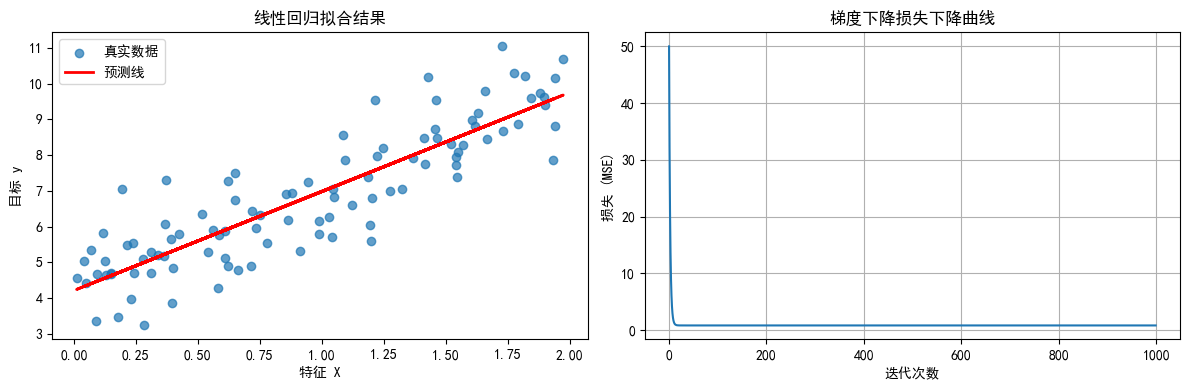

In [ ]:
# 生成示例数据
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100个样本，1个特征
y = 4 + 3 * X.flatten() + np.random.randn(100)  # 真实关系：y = 4 + 3x + 噪声，flatten()将二维展平为一维

# 数据标准化（加速梯度下降）
scaler = StandardScaler()  # 创建标准化工具:将数据转换为均值0、标准差1的分布
X_scaled = scaler.fit_transform(X)  # fit学习均值和标准差，transform执行转换，fit_transform一步完成

# 训练模型
model = LinearRegressionFromScratch(learning_rate=0.1, n_iterations=1000)
model.fit(X_scaled, y)

# 预测并评估
y_pred = model.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\n手写模型结果:")
print(f"权重 w = {model.weights[0]:.4f}")
print(f"偏置 b = {model.bias:.4f}")
print(f"均方误差(MSE) = {mse:.4f}")
print(f"R²分数 = {r2:.4f}")

# 可视化
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.7, label='真实数据')    #散点图
plt.plot(X, y_pred, color='red', linewidth=2, label='预测线')  #折线图
plt.xlabel('特征 X')
plt.ylabel('目标 y')
plt.title('线性回归拟合结果')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model.loss_history)
plt.xlabel('迭代次数')
plt.ylabel('损失 (MSE)')
plt.title('梯度下降损失下降曲线')
plt.grid(True)

plt.tight_layout()   # 自动布局
plt.show()